<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_Chapter5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0(%EC%8B%A4%EC%8A%B5_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 판다스 불러오기
import pandas as pd

#  데이터 읽어오기
df = pd.read_csv('./Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
# 지정 인덱스인 첫번째 칼럼 삭제하기
df.drop(df.columns[0],axis = 1, inplace = True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


##한글 글꼴 설치

In [6]:
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory det

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스(-) 기호 깨짐 방지

## 4. seaborn시각화 라이브러리 활용하기
* Seaborn은 Python의 시각화 라이브러리로,
통계적 데이터 시각화를 간편하고 아름답게 만들어주는 도구
* 데이터 분석 + 시각화를 동시에 할 수 있는 강력한 도구


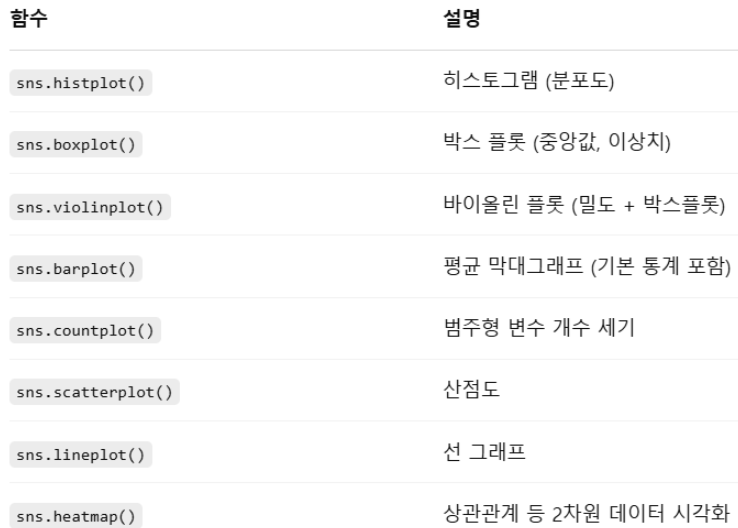

In [5]:
# Seaborn 라이브러리를 불러옴 (통계적 데이터 시각화용)
import seaborn as sns

# Matplotlib의 pyplot 모듈을 불러옴 (기본적인 그래프 출력용)
import matplotlib.pyplot as plt


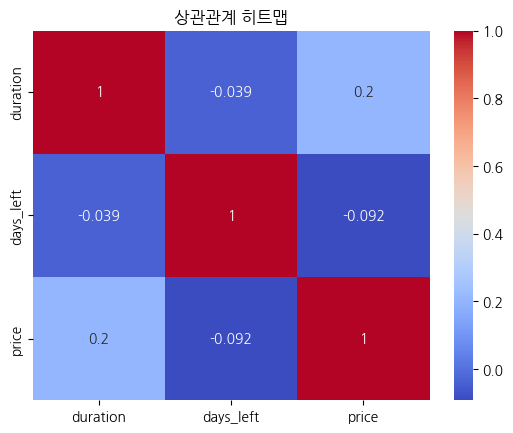

In [6]:
#예시 : 상관관계 히트맵
# df의 수치형 데이터 상관계수 구하기
corr = df.select_dtypes(include = ['number']).corr()
corr

# 상관계수 행렬을 히트맵 형태로 시각화 (색상으로 관계 강도 표현)
# 상관계수 데이터
# 각 셀에 수치(상관계수) 표시(수치 직접 표시해서 정량적으로 확인 가능)
# 색상 테마: 파랑(음의 상관) ~ 빨강(양의 상관))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

# 그래프 제목 설정
plt.title('상관관계 히트맵')

# 그래프 출력
plt.show()

### 1) 범주형 산점도(categorical plot)

* 범주형 데이터와 수치형 데이터의 관계를 시각화 할 수 있는 그래프
* row, col, hue 파라미터를 사용해서 더 많은 범주형 데이터의 관계를 확인
* row, col, hue 파라미터는 데이터의 하위 집합을 정의
* 하나의 그래프내에 표현하는지 여러개의 그래프로 나눠서 표현하는지 차이가 있을 뿐 기능은 동일


In [8]:
# pandas 라이브러리를 불러옴 (데이터프레임 처리 및 분석용)


# numpy 라이브러리를 불러옴 (수치 계산, 배열 처리용)
import numpy as np


# "Clean_Dataset.csv" 파일을 읽어와서 데이터프레임(df)로 저장
df = pd.read_csv('Clean_Dataset.csv')


# 'class' 열에 존재하는 고유한 값들을 출력 (중복 없이 어떤 클래스가 있는지 확인)
df['class'].unique()




array(['Economy', 'Business'], dtype=object)

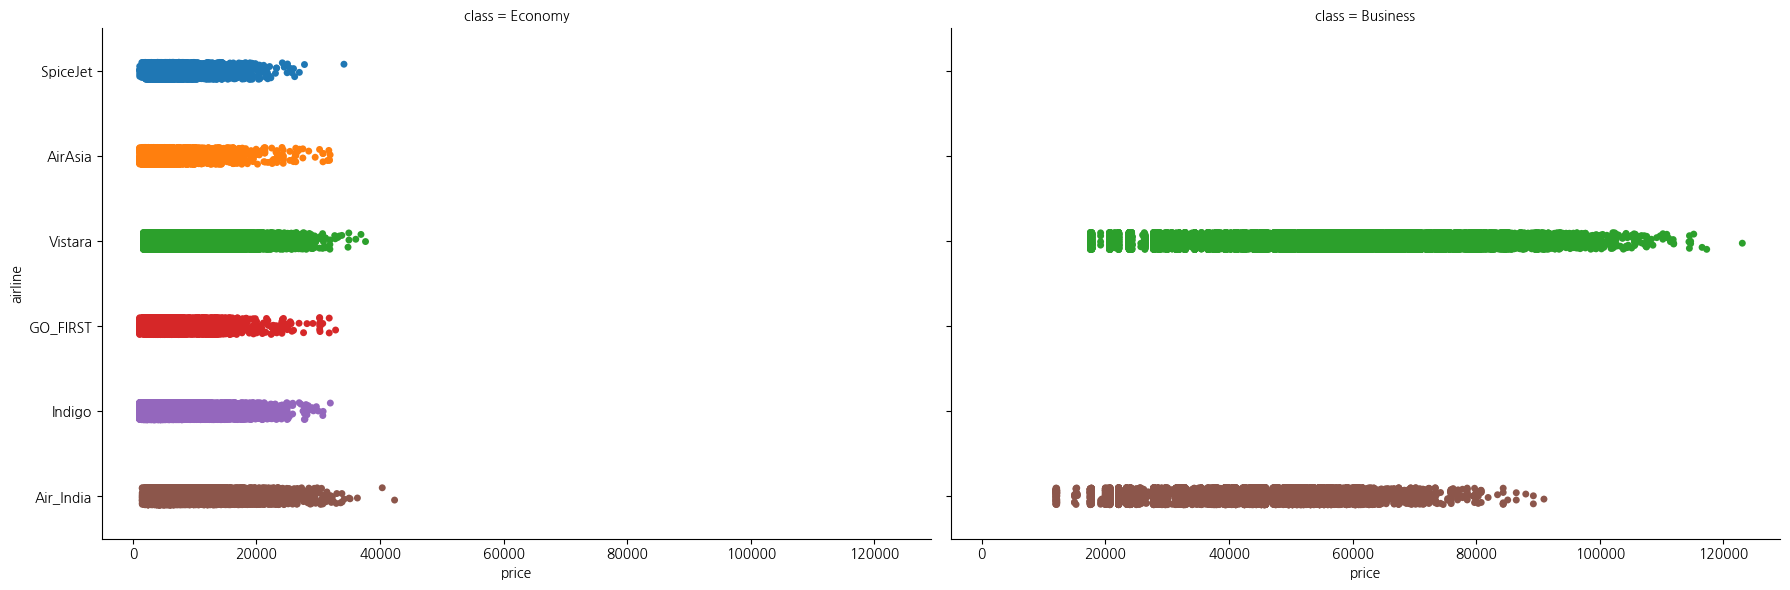

In [11]:
# seaborn 불러오기


# Matplotlib의 pyplot 모듈을 불러옴 (기본적인 그래프 출력용)


# 항공사별 색상으로 구분한 가격 분포 시각화(범주형 산점도 :catplot이용)
# y축: 항공사 이름
# x축: 항공권 가격
# class(좌석 등급)별로 subplot 분리 (예: Economy, Business)
# 사용할 데이터프레임
# 항공사별로 색상 다르게 지정
# 점 형태로 가격 분포 시각화 (많으면 겹쳐 보일 수 있음)//kind='swarm', kind='box', kind='violin'
# 그래프 높이 (단위: 인치)
# 가로 비율 (너비 = height × aspect)

sns.catplot(
    y='airline',
    x = 'price',
    col = 'class',
    data = df,
    hue = 'airline',
    kind = 'strip',
    height = 6,
    aspect = 1.5
)

# 그래프 보여주기
plt.show()

### 2) 선형회귀 모델그래프 (linear model plot)
* 선형회귀 모델과 연관 있는 함수로 일반적인 산점도와 함께 직선의 회귀선을 그려주기 때문에 특성간의 선형적인 관계를 확인하기 쉬운 그래프
* 이상치 데이터도 짐작 할 수 있음


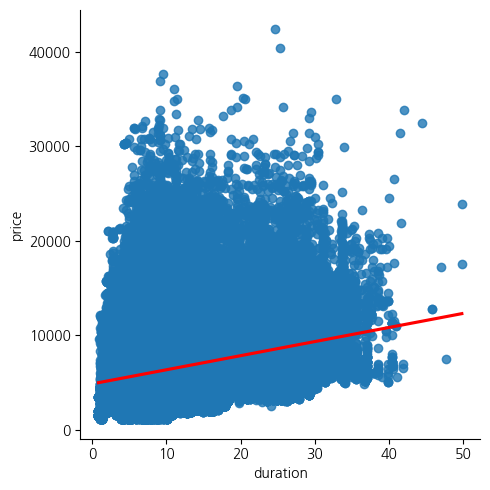

In [13]:
#sns.lmplot(linear model plot)을 사용하여 선형 회귀 모델그래프를 시각화
# 'class' 열이 'Economy'인 행만 필터링하여 df_eco에 저장 (이코노미 클래스만 추출)

df_eco = df[(df['class'] == 'Economy')]

# duration(비행 시간)과 price(항공권 가격) 간의 관계를 선형 회귀선과 함께 시각화
# 회귀선은 빨간색으로 표시

sns.lmplot(x='duration', y='price', data=df_eco, line_kws={'color': 'red'})


### 3) 빈도 그래프(count plot)
x축: 범주형 변수 (예: 성별, 지역, 클래스 등)

y축: 해당 범주가 등장한 빈도 수(횟수)

막대의 높이는 해당 항목이 데이터에 몇 번 등장했는지를 나타냅니다.

seaborn의 countplot() 또는 matplotlib의 bar() 등을 이용해 생성

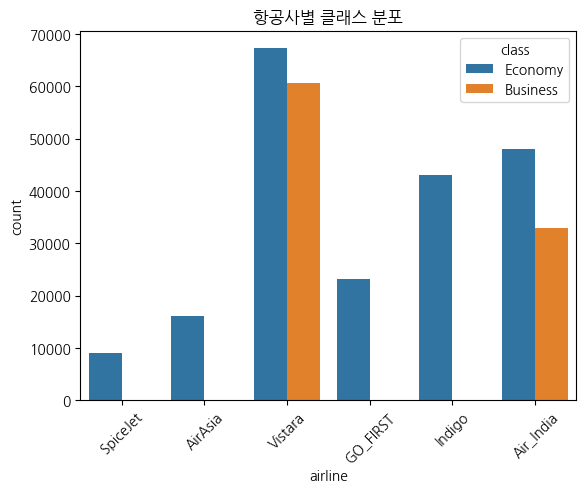

In [14]:
# 항공권 데이터의 빈도를 airline으로 구분하여 class별로 시각화 하기
# Seaborn과 matplotlib 불러오기


# Count plot 그리기
# x축에는 'airline' 컬럼의 항목들 (예: 항공사 이름들)을 표시
# 각 항공사 내에서 'class'(예: 이코노미, 비즈니스 등)별로 색을 다르게 나눠 그룹 비교
# 시각화에 사용할 데이터프레임은 df
sns.countplot(
    x = 'airline',
    hue = 'class',
    data = df
  )


# 그래프 제목 설정
plt.title('항공사별 클래스 분포')

# x축 레이블 회전 (이름이 길 경우 가독성 향상)
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()

### 4) 조인트 그래프(joint plot)

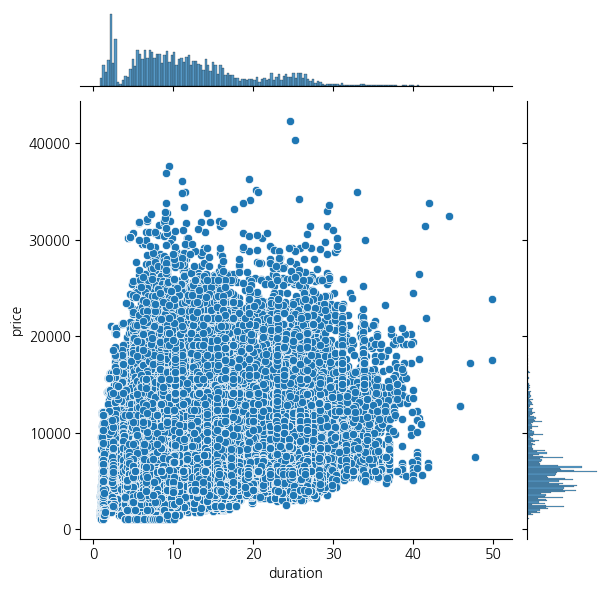

In [ ]:
# price와 duration간의 관계를 joint plot으로 시각화 하기




<Axes: >

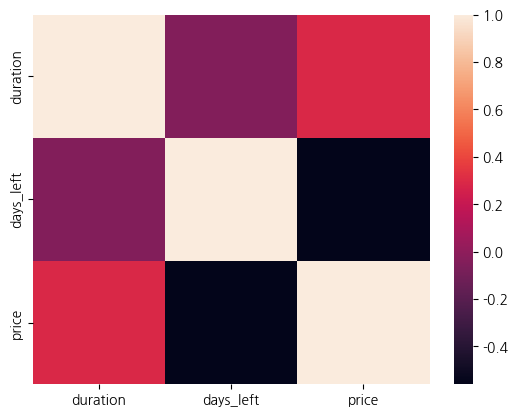

In [ ]:
# 'class' 열이 'Economy'인 행만 필터링하여 df_eco에 저장 (이코노미 클래스만 선택)



# 새로운 그래프 캔버스 생성 (이전 그래프와 겹치지 않도록)



# df_eco에서 수치형 데이터만 골라 상관계수 계산 후 히트맵으로 시각화


